In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', '{:.2f}'.format)


In [3]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loan = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [4]:
print(f"Shape of df_customers, df_bureau and df_loan respectively .....:")
df_customers.shape, df_bureau.shape, df_loan.shape

Shape of df_customers, df_bureau and df_loan respectively .....:


((50000, 12), (50000, 8), (50000, 15))

In [5]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [6]:
df_loan.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [7]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


###### From the given CSVs, the data is of 50000 customers. According to the data given each customers have one each loan which is imported to df_loan and bureau data of each customers and imported to df_bureau while the personal details of the customers are imported in df_customers. Since all have equal number of row and have customerId(cust_id) in common let's merge all 3 data frame.

In [8]:
df = pd.merge(df_customers, df_loan, on="cust_id")
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [9]:
df= pd.merge(df, df_bureau, on= "cust_id")
print(f"Shape of all 3 merged dataframes - df .....: {df.shape}")
df.head()

Shape of all 3 merged dataframes - df .....: (50000, 33)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [10]:
#To undertstand colum Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

##### In the above mentioned columns the column,<span style="color:red"> default</span> is our target feature/column. From the above info() it's data type is boolean. It's better to be in integer<span style="color:green">(0 or 1)</span> for our operations

In [11]:
df["default"] = df["default"].astype(int)
df["default"].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [12]:
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4


##### From the above df.head() we can see the boolean values are changed to 0s and 1s. Also from value_count() we are able to understand that there is a high class imbalance in the target column ad there is only around 8.5%  values of minority class 1.

In [13]:
X = df.drop("default", axis="columns")
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.25, random_state=22)

df_train = pd.concat([X_train,y_train], axis="columns")
df_test  = pd.concat([X_test,y_test], axis="columns")

In [14]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

##### As a usual practise we do train test split only after EDA and Feature engineering. But here we are doing it at start to control<span style="color:blue"> Data Leakage</span> which can possibly happen if the the test data influence the training data.

<h3 align="center" style="color:red"> Data Cleaning</h3>

###### Let's handle the null values first.

In [15]:
df.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 62
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
default                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_mon

##### Only one column have "residence_type" have null values. As this is categorical column this can be handled with <span style="color:green">mode of values</span> in the column.

In [34]:
df_train["residence_type"].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [37]:
mode_residence = df_train["residence_type"].mode()[0]
mode_residence

'Owned'

In [39]:
#Replacing null values in df_train
df_train["residence_type"] = df_train["residence_type"].fillna(mode_residence)
df_train["residence_type"].unique()

array(['Owned', 'Rented', 'Mortgage'], dtype=object)

In [41]:
#Replacing null values in df_test
df_test["residence_type"] = df_test["residence_type"].fillna(mode_residence)

In [43]:
#Checking duplicated data
df_test.duplicated().sum()

0

In [44]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio'],
      dtype='object')

In [48]:
columns_continuous = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
columns_categorical = df_train.select_dtypes(include=['object', 'category']).columns.tolist()


print("Continuous Columns:", columns_continuous)
print("Categorical Columns:", columns_categorical)


Continuous Columns: ['age', 'income', 'number_of_dependants', 'years_at_current_address', 'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default']
Categorical Columns: ['cust_id', 'gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'loan_id', 'loan_purpose', 'loan_type', 'disbursal_date', 'installment_start_dt']


##### We doesn't need some columns in above list which can be removed. Zipcode and default can be added as categorical variables as they are not continous. SO


In [49]:
columns_continuous.remove("default")
columns_continuous.remove("zipcode")

columns_categorical.remove("cust_id")
columns_categorical.remove("loan_id")
columns_categorical.remove("disbursal_date")
columns_categorical.remove("installment_start_dt")

columns_categorical.append("zipcode")
columns_categorical.append("default")


In [50]:
print("Continuous Columns:", columns_continuous)
print("Categorical Columns:", columns_categorical)

Continuous Columns: ['age', 'income', 'number_of_dependants', 'years_at_current_address', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio']
Categorical Columns: ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'loan_purpose', 'loan_type', 'zipcode', 'default']


##### Let's plot box plot and histogram to understand if any outliers are present in the continous columns:

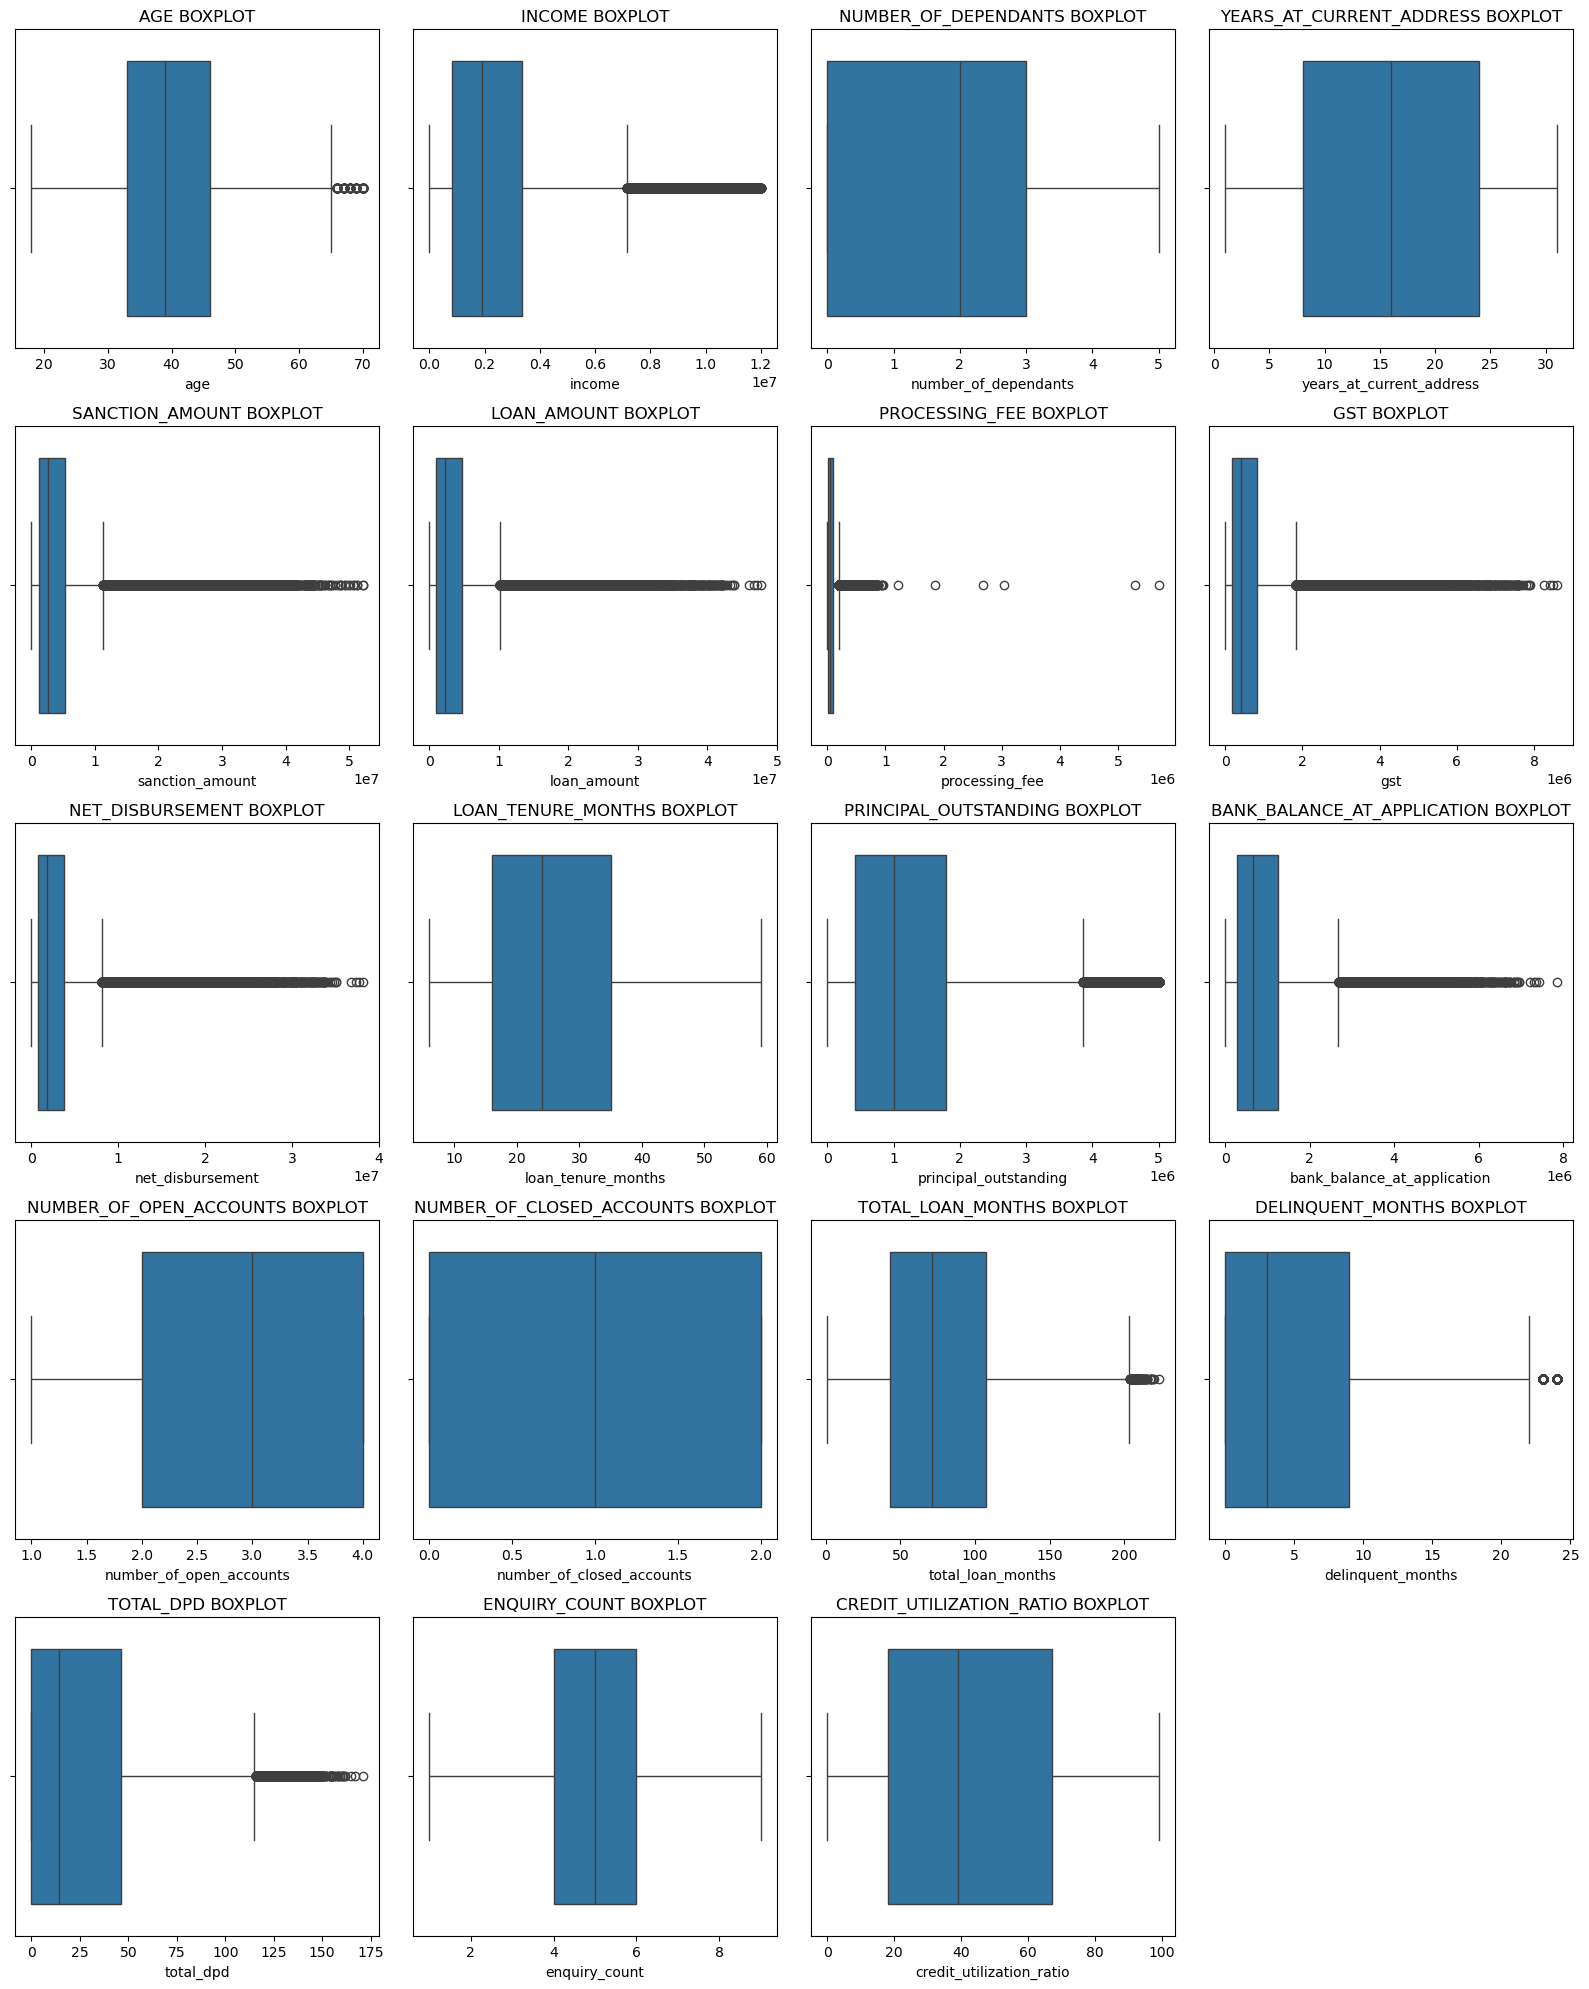

In [55]:
import math
plots_per_row = 4

# Calculate the number of rows needed
n_rows = math.ceil(len(columns_continuous) / plots_per_row)

# Create the subplots
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(16, 4 * n_rows))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through columns and plot boxplots
for i, col in enumerate(columns_continuous):
    sns.boxplot(data=df_train, x=col, ax=axes[i])
    axes[i].set_title(f"{col.upper()} BOXPLOT")

# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

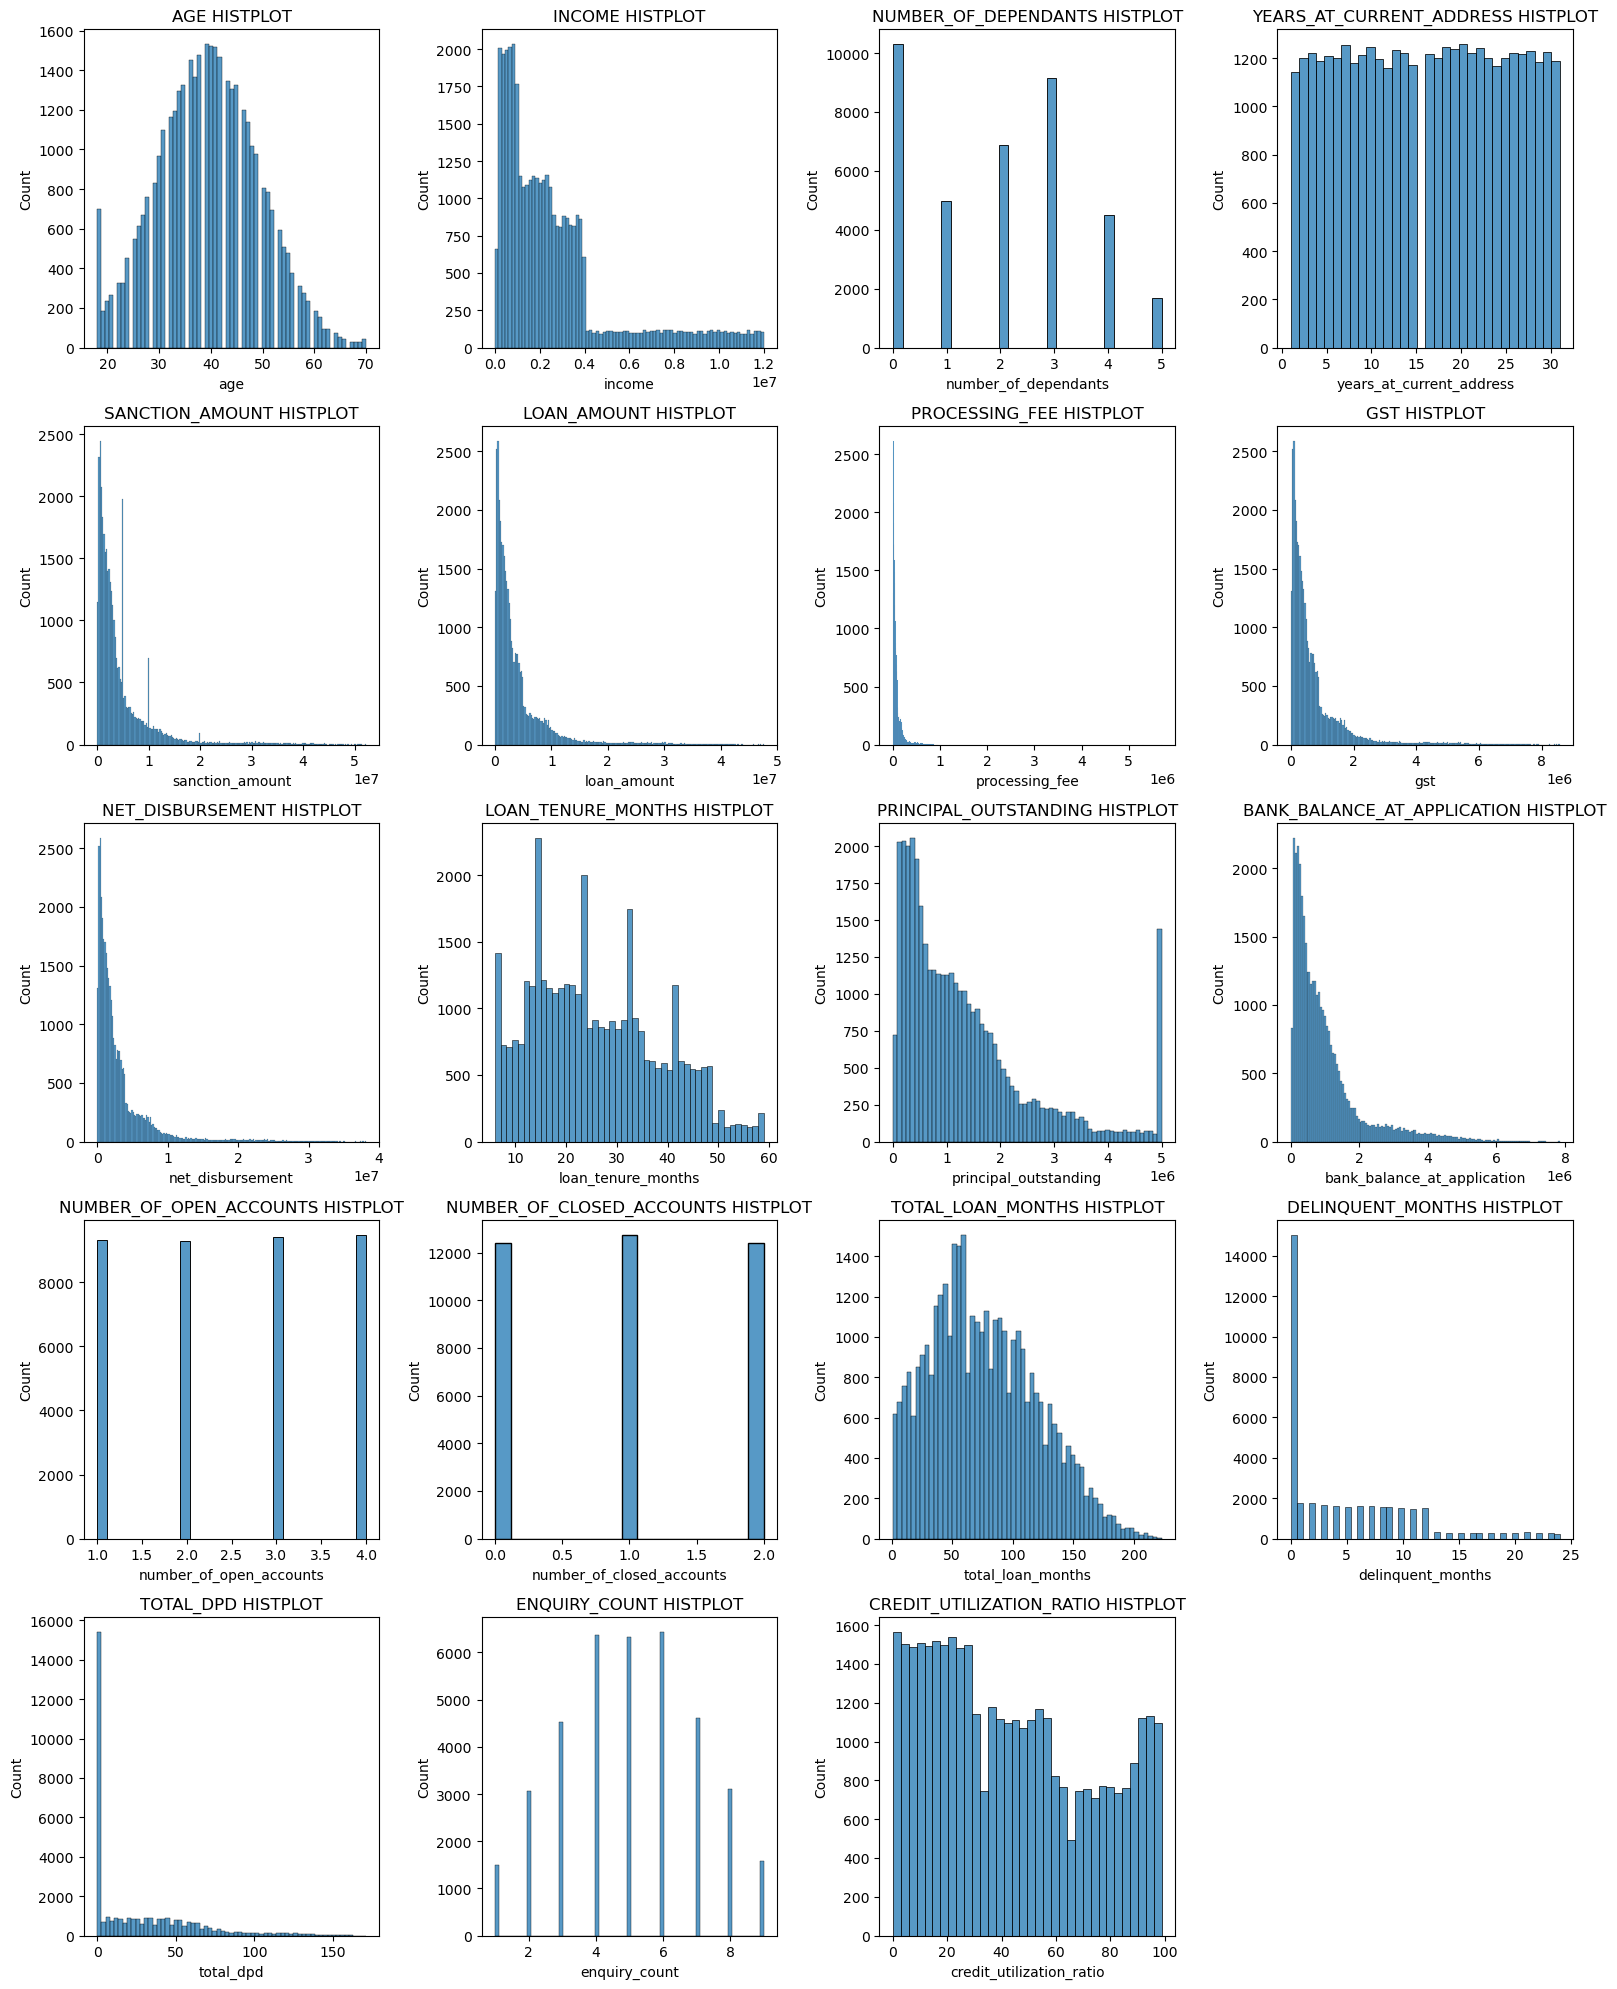

In [81]:
plots_per_row = 4

# Calculate the number of rows needed
n_rows = math.ceil(len(columns_continuous) / plots_per_row)

# Create the subplots
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(16, 4 * n_rows))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through columns and plot boxplots
for i, col in enumerate(columns_continuous):
    sns.histplot(data=df_train, x=col, ax=axes[i])
    axes[i].set_title(f"{col.upper()} HISTPLOT")

# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

##### The processing_fee column is found with outlier.

In [59]:
df_train["processing_fee"].describe()

count     37500.00
mean      80941.67
std      117275.13
min           0.00
25%       19420.00
50%       44960.00
75%       92600.00
max     5698029.90
Name: processing_fee, dtype: float64

In [64]:
df_train[df_train["processing_fee"] == df_train["processing_fee"].max()][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
12294,4639000,5698029.90


##### We could see processing fee greater than loan amount which is not correct. According to experts processing fee will be 2-3% of loan amount. So any value in processing fee more than 3% of loan value is outlier and need to be fixed with 3%.

In [65]:
df_train[df_train["processing_fee"]/df_train["loan_amount"]>.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
12294,4639000,5698029.90
29305,2616000,3036378.01
47089,1738000,1858964.77
9898,3626000,5293543.52
28174,966000,1214492.67
23981,2234000,2669791.02


In [71]:
#Store the data below 3% processing fee to the loan amount
df_train1 = df_train[df_train["processing_fee"]/df_train["loan_amount"]<=.03].copy()
df_train1[df_train1["processing_fee"]/df_train1["loan_amount"]>.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee


In [72]:
df_test1 = df_test[df_test["processing_fee"]/df_test["loan_amount"]<=.03].copy()
df_test1[df_test1["processing_fee"]/df_test1["loan_amount"]>.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee


##### If any cleaning needs to be done foe categorical value let's clean them.

In [73]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'zipcode',
 'default']

In [76]:
for col in columns_categorical:
    print(col, "unique values-->", df_train1[col].unique()) 

gender unique values--> ['M' 'F']
marital_status unique values--> ['Single' 'Married']
employment_status unique values--> ['Self-Employed' 'Salaried']
residence_type unique values--> ['Owned' 'Rented' 'Mortgage']
city unique values--> ['Jaipur' 'Chennai' 'Pune' 'Hyderabad' 'Delhi' 'Kolkata' 'Ahmedabad'
 'Bangalore' 'Lucknow' 'Mumbai']
state unique values--> ['Rajasthan' 'Tamil Nadu' 'Maharashtra' 'Telangana' 'Delhi' 'West Bengal'
 'Gujarat' 'Karnataka' 'Uttar Pradesh']
loan_purpose unique values--> ['Home' 'Personal' 'Auto' 'Education' 'Personaal']
loan_type unique values--> ['Secured' 'Unsecured']
zipcode unique values--> [302001 600001 411001 500001 110001 700001 380001 560001 226001 400001]
default unique values--> [0 1]


In [77]:
df_train1["loan_purpose"] = df_train1["loan_purpose"].replace("Personaal","Personal")

In [78]:
df_test1["loan_purpose"] = df_test1["loan_purpose"].replace("Personaal","Personal")

In [79]:
df_train1["loan_purpose"].unique() ,  df_test1["loan_purpose"].unique()

(array(['Home', 'Personal', 'Auto', 'Education'], dtype=object),
 array(['Personal', 'Home', 'Auto', 'Education'], dtype=object))

<h3 align="center" style="color:red">Exploratory Data Analysis</h3>

In [82]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

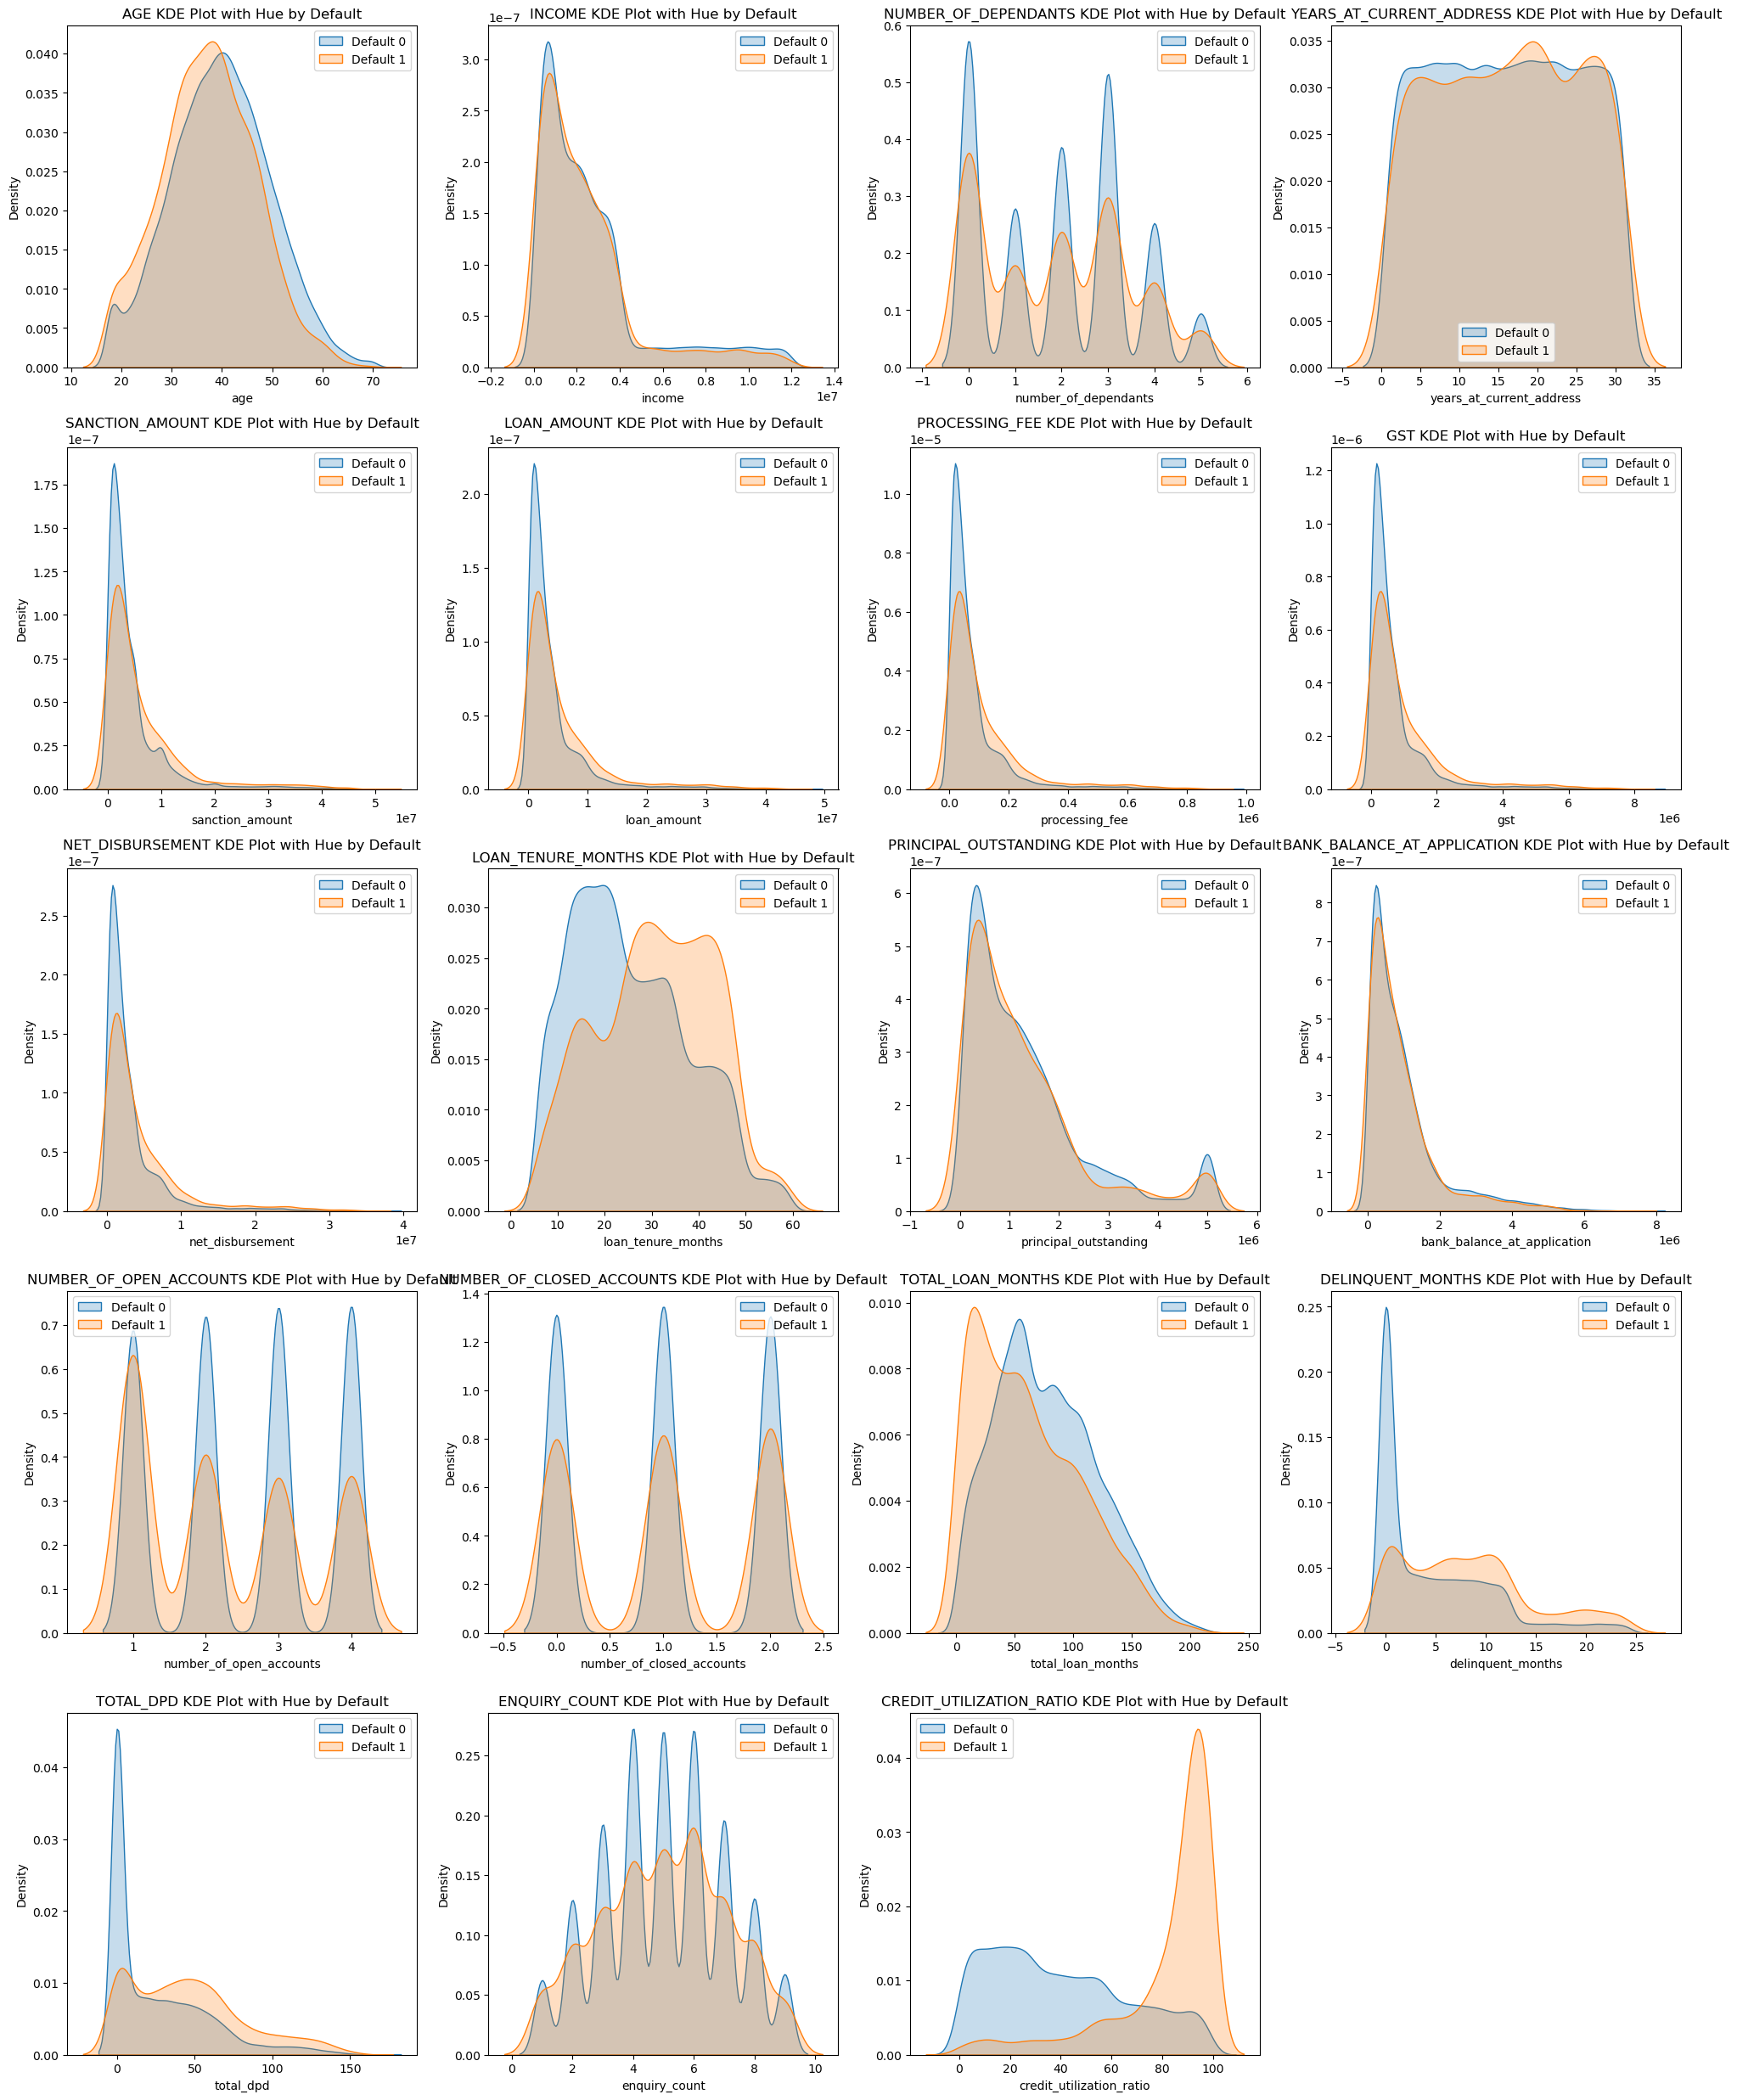

In [90]:
# Number of plots per row
plots_per_row = 4

# Calculate the number of rows needed
n_rows = math.ceil(len(columns_continuous) / plots_per_row)

# Create the subplots
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(20, 5 * n_rows))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through columns and plot KDE plots
for i, cols in enumerate(columns_continuous):
    sns.kdeplot(df_train1[df_train1["default"] == 0][cols], fill=True, ax=axes[i], label="Default 0")
    sns.kdeplot(df_train1[df_train1["default"] == 1][cols], fill=True, ax=axes[i], label="Default 1")
    axes[i].set_title(f"{cols.upper()} KDE Plot with Hue by Default")
    axes[i].legend()

# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### Insights from KDE Plots

### General Observations:
1. **Comparison by `default` Status (0 and 1)**:
   - The blue and orange lines represent distributions for `default = 0` and `default = 1`, respectively.
   - Significant differences in these distributions suggest that the column might be predictive of the default status.

---

### Insights Per Plot:
#### 1. `AGE`:
   - The default (1) distribution is slightly higher for younger ages (20-35).
   - Individuals who are older (40+) are more likely to be non-defaults (`default = 0`).

#### 2. `INCOME`:
   - Defaults (1) tend to have lower incomes, as shown by the density peak for `default = 1` being closer to the lower end of the income range.
   - Higher income levels are associated with non-defaults (`default = 0`).

#### 3. `NUMBER_OF_DEPENDANTS`:
   - Individuals with 0-2 dependents dominate the dataset for both default and non-default groups.
   - A slight skew indicates more defaults among those with fewer dependents.

#### 4. `YEARS_AT_CURRENT_ADDRESS`:
   - Non-defaults (`default = 0`) generally have longer tenures at their current address, as indicated by a higher density for longer durations.
   - Defaults (`default = 1`) are distributed more evenly but peak slightly earlier.

#### 5. `SANCTION_AMOUNT` and `LOAN_AMOUNT`:
   - Defaults are concentrated at lower loan amounts, while higher sanction amounts and loan amounts are more associated with non-defaults.
   - This suggests that individuals with larger sanctioned loans might have better financial stability.

#### 6. `PROCESSING_FEE`:
   - Defaults are slightly concentrated at lower processing fees.
   - Higher processing fees appear correlated with non-defaults, likely because higher fees may correspond to higher loan amounts.

#### 7. `GST`:
   - Defaults (`default = 1`) cluster at lower GST amounts, indicating smaller loan-related charges.
   - Higher GST values show a stronger correlation with non-defaults.

#### 8. `NET_DISBURSEMENT`:
   - Similar to loan amounts, defaults are more prevalent at lower disbursement amounts.
   - Non-defaults dominate at higher disbursement amounts.

#### 9. `LOAN_TENURE_MONTHS`:
   - Defaults have a noticeable peak for shorter loan tenures (10-20 months), while non-defaults are spread more evenly across all tenures.
   - Longer tenures (30+ months) show a stronger association with non-defaults.

#### 10. `PRINCIPAL_OUTSTANDING`:
   - Defaults cluster at lower outstanding balances, indicating that smaller ongoing obligations are linked with defaults.
   - Non-defaults dominate at higher outstanding balances.

#### 11. `BANK_BALANCE_AT_APPLICATION`:
   - Defaults (`default = 1`) cluster at lower bank balances during loan applications.
   - Higher bank balances are more strongly correlated with non-defaults, suggesting financial stability.

#### 12. `NUMBER_OF_OPEN_ACCOUNTS`:
   - **Non-defaults (`default = 0`)** have higher densities at all account levels.
   - **Defaults (`default = 1`)** are slightly less frequent, indicating that individuals with more open accounts may be better at managing loans.

#### 13. `NUMBER_OF_CLOSED_ACCOUNTS`:
   - **Non-defaults (`default = 0`)** dominate at higher counts of closed accounts.
   - This suggests that individuals who have successfully closed accounts in the past are less likely to default.

#### 14. `TOTAL_LOAN_MONTHS`:
   - **Defaults (`default = 1`)** peak at shorter loan durations (0–50 months).
   - Longer loan durations (50+ months) are associated with **non-defaults (`default = 0`)**, which could indicate better financial planning and ability to handle long-term commitments.

#### 15. `DELINQUENT_MONTHS`:
   - **Defaults (`default = 1`)** have higher densities at all delinquency durations.
   - Non-defaults rarely show any delinquency, which strongly correlates delinquency with default risk.

#### 16. `TOTAL_DPD (Days Past Due)`:
   - **Defaults (`default = 1`)** cluster around higher `DPD` values, showing a significant correlation between higher days past due and defaulting.
   - **Non-defaults (`default = 0`)** are concentrated around `DPD = 0`, indicating better payment discipline.

#### 17. `ENQUIRY_COUNT`:
   - **Defaults (`default = 1`)** tend to have a slightly higher number of credit enquiries compared to non-defaults.
   - This suggests that frequent credit enquiries might be a risk factor for default.

#### 18. `CREDIT_UTILIZATION_RATIO`:
   - **Defaults (`default = 1`)** have a sharp peak at very high credit utilization ratios (~100%), showing that individuals who max out their credit are more likely to default.
   - **Non-defaults (`default = 0`)** exhibit more balanced utilization ratios, indicating healthier credit management.


---

### Predictive Columns:
- The following columns show strong distinctions between `default = 0` and `default = 1`, making them potentially predictive for a default risk model:
  1. `NUMBER_OF_OPEN_ACCOUNTS`: Non-defaults have higher densities across all levels.
  2. `NUMBER_OF_CLOSED_ACCOUNTS`: Non-defaults dominate at higher numbers of closed accounts.
  3. `TOTAL_LOAN_MONTHS`: Shorter loan terms are strongly associated with defaults, while longer terms are more common among non-defaults.
  4. `DELINQUENT_MONTHS`: Defaults show consistently higher delinquency durations.
  5. `TOTAL_DPD (Days Past Due)`: Defaults have significantly higher `DPD` values, while non-defaults cluster around `DPD = 0`.
  6. `CREDIT_UTILIZATION_RATIO`: Defaults peak at very high utilization ratios, indicating a strong correlation with default risk.

---

### Financial Stability Indicators:
- The following patterns suggest stronger financial stability and are associated with `default = 0`:
  1. **Higher Number of Closed Accounts**: Successfully closing accounts is a sign of financial discipline.
  2. **Longer Loan Durations**: Non-defaults are more common among loans with longer tenures, suggesting better planning and repayment ability.
  3. **Zero Delinquent Months and Low Days Past Due (DPD)**: Non-defaults show minimal or no delinquency in repayment.
  4. **Balanced Credit Utilization Ratios**: Non-defaults have more evenly distributed credit utilization, reflecting healthier credit management.

---

### Actionable Insight:
1. **Monitoring High-Risk Groups**:
   - Individuals with high `CREDIT_UTILIZATION_RATIO` (~100%) and multiple delinquent months should be closely monitored or subjected to stricter approval criteria.
   - Borrowers with higher `TOTAL_DPD` should be flagged as high-risk.

2. **Credit and Account Management**:
   - Encouraging borrowers to close existing accounts before opening new ones can improve financial discipline and reduce default risk.
   - Longer loan terms might be beneficial for individuals who have difficulty managing shorter repayment cycles.

3. **Targeted Interventions**:
   - Offer financial literacy programs for borrowers with very high credit utilization and frequent credit enquiries.
   - Tailor loan products with lower monthly payments for high-risk individuals to reduce `DPD` and delinquency rates.


<h3 align="center" style="color:red">Feature Engineering</h3>

#### As part of Feature Engineering, there is need of creating some feature/columns from the already exist columns, like:

##### 1. Loan to Income  = Loan Amount / Income
##### 2. Delinquency Ratio =  Delinquent Months / Total_loan_months
##### 3. Average DPD per Delinquency =Total DPD / Delinquent Months


In [104]:
df_train1["loan_to_income"] = round(df_train1["loan_amount"]/df_train1["income"],2)
df_train1[["loan_amount", "income", "loan_to_income"]].head(5)

,loan_amount,income,loan_to_income
13582,5173000,1477000,3.50
14554,5574000,2145000,2.60
48638,826000,977000,0.85
28413,1164000,1565000,0.74
47980,371000,428000,0.87


In [105]:
df_train1["loan_to_income"].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.59
Name: loan_to_income, dtype: float64

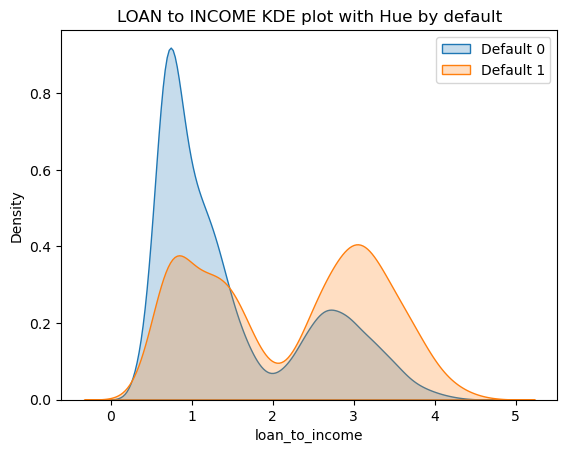

In [106]:
sns.kdeplot(df_train1[df_train1["default"]==0]["loan_to_income"], fill=True, label = "Default 0")
sns.kdeplot(df_train1[df_train1["default"]==1]["loan_to_income"], fill=True, label = "Default 1")
plt.title(f"LOAN to INCOME KDE plot with Hue by default")
plt.legend()
plt.show()

#### Insights:
1. **Default Risk Threshold**:
   - A `Loan to Income` ratio of with **low values** appears to be a safe threshold, as most non-defaults fall within this range.
   - Ratios with **high** show a much higher likelihood of default, suggesting that this is a critical risk threshold.

2. **High-Risk Borrowers**:
   - Borrowers with `Loan to Income` ratios above **3** are significantly more likely to default, as indicated by the strong peak of the orange curve.

3. **Credit Evaluation**:
   - Borrowers with `Loan to Income` ratios less than **1** are more likely to have manageable repayment obligations and are less likely to default.
   - Individuals with higher ratios should be subject to stricter credit approval and monitoring processes.

In [103]:
df_train1["delinquency_ratio"] = round(df_train1["delinquent_months"]*100/df_train1["total_loan_months"],2)
df_train1[["delinquent_months", "total_loan_months", "delinquency_ratio"]].head(5)

,delinquent_months,total_loan_months,delinquency_ratio
13582,0,62,0.00
14554,11,64,17.19
48638,0,142,0.00
28413,0,26,0.00
47980,9,80,11.25


In [113]:
df_train1["delinquency_ratio"].describe()

count   37488.00
mean       10.41
std        17.31
min         0.00
25%         0.00
50%         3.85
75%        13.04
max       100.00
Name: delinquency_ratio, dtype: float64

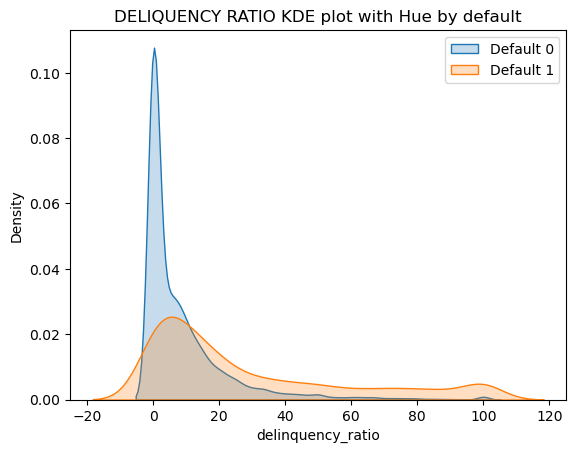

In [108]:
sns.kdeplot(df_train1[df_train1["default"]==0]["delinquency_ratio"], fill=True, label = "Default 0")
sns.kdeplot(df_train1[df_train1["default"]==1]["delinquency_ratio"], fill=True, label = "Default 1")
plt.title(f"DELIQUENCY RATIO KDE plot with Hue by default")
plt.legend()
plt.show()

#### Insights:

1. **Minimal Delinquency Indicates Stability**:
   - A `Delinquency Ratio` of **0** is a strong indicator of non-default (`default = 0`), as the majority of non-defaults fall within this range.

2. **Default Risk Increases with Delinquency Ratio**:
   - As the `Delinquency Ratio` increases beyond **20**, the likelihood of default (`default = 1`) rises significantly, as observed from the higher density of defaults in this range.

3. **High Delinquency Ratios Indicate Severe Risk**:
   - Defaults (`default = 1`) exhibit a long tail extending up to **100+**, suggesting that borrowers with high delinquency ratios are at severe risk of defaulting.

4. **Critical Threshold for Delinquency**:
   - Borrowers with `Delinquency Ratios > 20` should be closely monitored, as the density of defaults dominates in this range.

5. **Low Delinquency ≠ Zero Risk**:
   - While a `Delinquency Ratio` close to **0** is predominantly associated with non-defaults, there is still a small density of defaults even in this range, highlighting that other factors may contribute to default risk.


In [115]:
df_train1["avg_dpd_per_delinquency"] = round(df_train1["total_dpd"]/df_train1["delinquent_months"],2)
df_train1[["total_dpd", "delinquent_months", "avg_dpd_per_delinquency"]].head(5)

,total_dpd,delinquent_months,avg_dpd_per_delinquency
13582,0,0,NaN
14554,64,11,5.82
48638,0,0,NaN
28413,0,0,NaN
47980,55,9,6.11


In [114]:
df_train1["avg_dpd_per_delinquency"] .describe()

count   22495.00
mean        5.50
std         1.40
min         1.00
25%         4.75
50%         5.50
75%         6.27
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

In [116]:
#From the above head() we could find many NaN values
df_train1["avg_dpd_per_delinquency"].isna().sum()

14993

In [118]:
#This is because of many customers having deliquent_months as 0. For this case replacing with 0 is correct.
df_train1["avg_dpd_per_delinquency"] = df_train1["avg_dpd_per_delinquency"].fillna(0)
df_train1["avg_dpd_per_delinquency"].isna().sum()

0

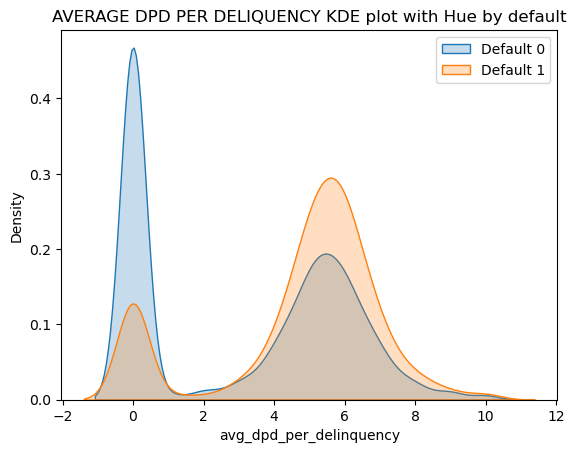

In [119]:
sns.kdeplot(df_train1[df_train1["default"]==0]["avg_dpd_per_delinquency"], fill=True, label = "Default 0")
sns.kdeplot(df_train1[df_train1["default"]==1]["avg_dpd_per_delinquency"], fill=True, label = "Default 1")
plt.title(f"AVERAGE DPD PER DELIQUENCY KDE plot with Hue by default")
plt.legend()
plt.show()

### Insights:

1. **Non-defaults (`default = 0`)**:
   - The blue curve peaks sharply near **0**, indicating that most non-defaults have minimal or no average days past due (DPD) per delinquency.
   - The density drops significantly beyond a DPD of **4**, showing that non-defaults are highly concentrated in the lower range of delinquency.

2. **Defaults (`default = 1`)**:
   - The orange curve peaks around a DPD value of **6**, showing that defaults are more likely to have higher average DPD per delinquency.
   - Defaults have a broader spread compared to non-defaults, with a significant tail extending up to **10** or more, indicating a stronger association with higher delinquency levels.

3. **Distinct Regions**:
   - For **`DPD < 2`**, the density of non-defaults dominates, suggesting a lower risk of default for borrowers with minimal days past due.
   - For **`DPD > 4`**, the density of defaults overtakes non-defaults, highlighting a critical threshold where higher average DPD per delinquency strongly correlates with default risk.

4. **Critical Threshold**:
   - Borrowers with an average DPD per delinquency exceeding **4** should be closely monitored as they are more likely to default.



In [122]:
#Let's do all the above Feature Engineering for df_test1
df_test1["loan_to_income"] = round(df_test1["loan_amount"]/df_test1["income"],2)
df_test1["delinquency_ratio"] = round(df_test1["delinquent_months"]*100/df_test1["total_loan_months"],2)
df_test1["avg_dpd_per_delinquency"] = round(df_test1["total_dpd"]/df_test1["delinquent_months"],2)
df_test1["avg_dpd_per_delinquency"] = df_test1["avg_dpd_per_delinquency"].fillna(0)

In [120]:
df_train1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

<h4 align="left" style="color:Blue">Feature Selection</h3>

##### Technically from the above columns it's needed to drop columns like cust_id, loan_id which are really not required for training and testing

In [123]:
df_train2 = df_train1.drop(["cust_id", "loan_id"], axis="columns")
df_test2 = df_test1.drop(["cust_id", "loan_id"], axis="columns")

In [125]:
df_train2.columns , df_test2.columns

(Index(['age', 'gender', 'marital_status', 'employment_status', 'income',
        'number_of_dependants', 'residence_type', 'years_at_current_address',
        'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
        'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
        'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
        'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
        'number_of_open_accounts', 'number_of_closed_accounts',
        'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
        'credit_utilization_ratio', 'default', 'loan_to_income',
        'delinquency_ratio', 'avg_dpd_per_delinquency'],
       dtype='object'),
 Index(['age', 'gender', 'marital_status', 'employment_status', 'income',
        'number_of_dependants', 'residence_type', 'years_at_current_address',
        'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
        'sanction_amount', 'loan_amount', 'processing

##### Also from business knowledge and the above feature engineering we can also drop some other columns such as : 'disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 'total_loan_months', 'delinquent_months', 'total_dpd

In [128]:
df_train3 = df_train2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test3 = df_test2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train3.columns, df_test3.columns

(Index(['age', 'gender', 'marital_status', 'employment_status',
        'number_of_dependants', 'residence_type', 'years_at_current_address',
        'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
        'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
        'loan_tenure_months', 'principal_outstanding',
        'bank_balance_at_application', 'number_of_open_accounts',
        'number_of_closed_accounts', 'enquiry_count',
        'credit_utilization_ratio', 'default', 'loan_to_income',
        'delinquency_ratio', 'avg_dpd_per_delinquency'],
       dtype='object'),
 Index(['age', 'gender', 'marital_status', 'employment_status',
        'number_of_dependants', 'residence_type', 'years_at_current_address',
        'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
        'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
        'loan_tenure_months', 'principal_outstanding',
        'bank_balance_at_application', 'number_of_open_accounts',


In [132]:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 13582 to 4086
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee    

##### As there is possibility for having multi collinerity between the numeric columns, it's better to calculate VIF(Variance Inflation Factor) to drop the required columns.

In [134]:
df_train3.select_dtypes(include=["int64", "float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

<h4 align="left" style="color:Blue">Calculating VIF to measure Multi Collinearity</h3>

In [165]:
X_train = df_train3.drop("default", axis="columns")
y_train = df_train3["default"]

#To measure VIF, first have to scale the data 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = df_train3.select_dtypes(include=["int64", "float64"]).columns.drop("default")

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000
mean,0.414,0.387,0.501,0.524,0.089,0.083,0.083,0.083,0.376,0.262,0.124,0.502,0.500,0.502,0.438,0.293,0.104,0.330
std,0.189,0.307,0.297,0.287,0.121,0.113,0.113,0.113,0.234,0.246,0.134,0.373,0.407,0.253,0.296,0.227,0.173,0.291
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.325,0.021,0.019,0.019,0.019,0.189,0.078,0.034,0.333,0.000,0.375,0.182,0.110,0.000,0.000
50%,0.404,0.400,0.500,0.510,0.050,0.046,0.046,0.046,0.340,0.194,0.083,0.667,0.500,0.500,0.394,0.200,0.038,0.433
75%,0.538,0.600,0.767,0.763,0.099,0.096,0.096,0.096,0.547,0.354,0.157,1.000,1.000,0.625,0.677,0.503,0.130,0.575
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [139]:
X_test = df_test3.drop("default", axis="columns")
y_test = df_test3["default"]

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.49,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.28,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.25,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.35,0.15,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.96,1.00,1.00,1.00,1.00,1.00,0.92,1.00,1.00,1.00,1.00,0.99,1.00,1.00


In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [142]:
calculate_vif(X_train[cols_to_scale])

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.67
1,number_of_dependants,2.72
2,years_at_current_address,3.44
3,zipcode,3.79
4,sanction_amount,99.95
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.14
9,principal_outstanding,16.13


###### From the above VIF calculation we can understand that we are in need to drop columns like sanction_amount(99.5), [processing_fee, gst,net_disbursement (infinite)],principal_outstanding(16.13) those having high VIF above 10. This must be done one by one, it was tried and so dropping.

In [143]:
features_to_drop_vif = ["sanction_amount", "processing_fee", "gst", "net_disbursement", "net_disbursement"]

X_train1 = X_train.drop(features_to_drop_vif, axis="columns")

In [145]:
num_cols = X_train1.select_dtypes(include=["int64", "float64"]).columns
vif_df = calculate_vif(X_train1[num_cols])
vif_df

,Column,VIF
0,age,5.51
1,number_of_dependants,2.72
2,years_at_current_address,3.42
3,zipcode,3.77
4,loan_tenure_months,6.02
5,principal_outstanding,10.92
6,bank_balance_at_application,9.23
7,number_of_open_accounts,4.38
8,number_of_closed_accounts,2.37
9,enquiry_count,6.39


In [146]:
selected_num_features_vif = vif_df["Column"].values
selected_num_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'], dtype=object)

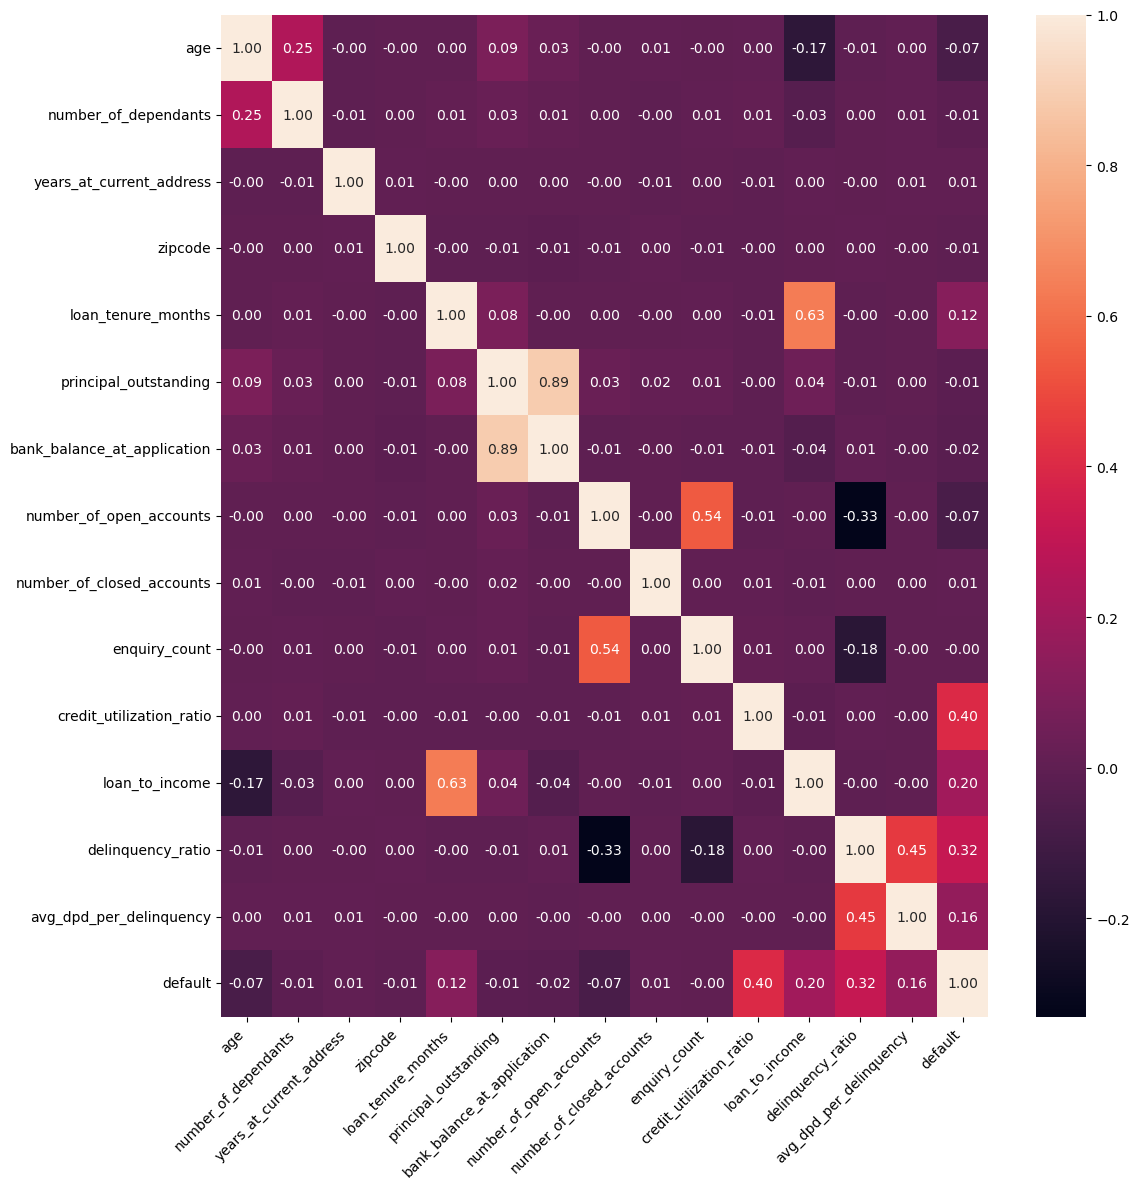

In [149]:
plt.figure(figsize=(12,12))
cm = df_train3[num_cols.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Insights from VIF Correlation Heatmap:

##### 1. **Strong Correlations**:
   - **`principal_outstanding` and `bank_balance_at_application`**:
     - Correlation = **0.89**, indicating a very strong linear relationship.
     - This suggests potential multicollinearity between these two features, and one of them may need to be removed to avoid redundancy.

   - **`loan_to_income` and `loan_tenure_months`**:
     - Correlation = **0.63**, indicating a moderately strong positive relationship.
     - Longer loan tenures are associated with higher loan-to-income ratios.

   - **`loan_to_income` and `credit_utilization_ratio`**:
     - Correlation = **0.40**, showing that higher credit utilization ratios are linked with higher loan-to-income ratios.

   - **`credit_utilization_ratio` and `enquiry_count`**:
     - Correlation = **0.54**, suggesting that individuals with higher credit utilization ratios tend to have a higher number of credit enquiries.

##### 2. **Weak Correlations with `default`**:
   - The `default` column has weak to moderate correlations with the following features:
     - **`credit_utilization_ratio`**: Correlation = **0.40**.
       - Higher credit utilization ratios are moderately associated with default risk.
     - **`loan_to_income`**: Correlation = **0.32**.
       - Higher loan-to-income ratios indicate a slight increase in default risk.
     - **`delinquency_ratio`**: Correlation = **0.20**.
       - Delinquency ratios have a weak positive correlation with default risk.
     - **`avg_dpd_per_delinquency`**: Correlation = **0.16**.
       - Average days past due per delinquency is weakly correlated with default risk.

##### 3. **No Significant Correlations**:
   - Several features, such as `age`, `number_of_dependants`, `years_at_current_address`, and `number_of_closed_accounts`, show minimal or no correlation with other features or the `default` column.

##### 4. **Actionable Insights**:
   - Consider removing one of the strongly correlated features, such as `bank_balance_at_application` or `principal_outstanding`, to reduce multicollinearity.
   - Focus on features like `credit_utilization_ratio`, `loan_to_income`, and `delinquency_ratio` as they show moderate correlations with `default`, making them important predictors for default risk.
   - Features with minimal correlation to `default` (e.g., `age`, `zipcode`, etc.) may not significantly impact the predictive power of the model and could potentially be excluded.


##### Like wise we did feature engineering for numeric columns, we can do feature engineering using Weight of Evidence (WOE) and Information Value (IV) on Categorical columns.

In [150]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'zipcode',
 'default']

In [152]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7464,325,7139,0.10,0.21,-0.73,0.08
Education,5670,562,5108,0.17,0.15,0.16,0.00
Home,11306,1740,9566,0.54,0.28,0.66,0.17
Personal,13048,596,12452,0.18,0.36,-0.68,0.12


In [155]:
iv_values = {}

for feature in X_train1.columns:
    if X_train1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': 0.07543753172792894,
 'gender': 0.0007530640612012369,
 'marital_status': 0.002192179162864365,
 'employment_status': 0.003347749590206388,
 'number_of_dependants': 0.003115420948676591,
 'residence_type': 0.24604356902629523,
 'years_at_current_address': 0.003936906802659032,
 'city': 0.002546897191933756,
 'state': 0.0021334953561850745,
 'zipcode': 0.0025354857171784205,
 'loan_purpose': 0.374485493183757,
 'loan_type': 0.1646911054103142,
 'loan_tenure_months': 0.2246477799862608,
 'principal_outstanding': 0.02043161760704403,
 'bank_balance_at_application': 0.009017753879797545,
 'number_of_open_accounts': 0.07775519524047743,
 'number_of_closed_accounts': 0.0008619592759228436,
 'enquiry_count': 0.007930353285962524,
 'credit_utilization_ratio': 2.362427779814343,
 'loan_to_income': 0.47113999007877927,
 'delinquency_ratio': 0.7339679183913623,
 'avg_dpd_per_delinquency': 0.4102298909760579}

In [157]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))


iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
18,credit_utilization_ratio,2.362
20,delinquency_ratio,0.734
19,loan_to_income,0.471
21,avg_dpd_per_delinquency,0.410
10,loan_purpose,0.374
5,residence_type,0.246
12,loan_tenure_months,0.225
11,loan_type,0.165
15,number_of_open_accounts,0.078
0,age,0.075


In [158]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'principal_outstanding',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

<h4 align="left" style="color:Blue">Feature Encoding</h3>

In [161]:
X_train_reduced = X_train1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [162]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,principal_outstanding,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
13582,0.000,0.415,0.145,0.667,0.677,0.746,0.000,0.000,True,False,False,True,False,False
14554,0.308,0.679,0.198,0.333,0.980,0.536,0.172,0.582,False,True,False,True,False,False
48638,0.250,0.264,0.112,1.000,0.990,0.128,0.000,0.000,False,False,False,False,True,True


In [163]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,principal_outstanding,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
42070,0.385,0.000,0.175,0.000,0.657,0.105,0.081,0.633,True,False,False,False,True,True
35064,0.385,0.075,0.074,0.333,0.909,0.096,0.000,0.000,True,False,False,False,True,True
435,0.423,0.660,1.000,1.000,0.495,0.545,0.089,0.586,True,False,False,True,False,False


<h3 align="center" style="color:red">Model Training</h3>

#### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.84      0.71      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.85      0.87     12497
weighted avg       0.96      0.96      0.96     12497



In [169]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [170]:
from xgboost import XGBRFClassifier

model = XGBRFClassifier()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.77      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.87      0.87     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [171]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


python(81762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81766) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81767) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81768) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best Parameters: {'solver': 'newton-cg', 'C': 10000.0}
Best Score: 0.7608373581430171
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.83      0.73      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: XGBOOST

In [174]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7868084247463027
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11423
           1       0.79      0.86      0.82      1074

    accuracy                           0.97     12497
   macro avg       0.89      0.92      0.90     12497
weighted avg       0.97      0.97      0.97     12497



##### From the above we could understand that we are not able to bring a good recall above 90% which is really needed for this credit default system now let's attempt again:

#### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [176]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [177]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.94      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [178]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.50      0.99      0.66      1074

    accuracy                           0.91     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.91      0.93     12497



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [179]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34213
1    34213
Name: count, dtype: int64

In [181]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.95      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



#### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna instead GridSearchCV

In [192]:
# Define the objective function for Optuna
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2024-12-05 21:19:55,051] A new study created in memory with name: no-name-776085a9-88ac-4cca-9e31-690422141cfa
[I 2024-12-05 21:19:55,227] Trial 0 finished with value: 0.9431939075425565 and parameters: {'C': 879.0551803867444, 'solver': 'saga', 'tol': 0.08019873846199828, 'class_weight': None}. Best is trial 0 with value: 0.9431939075425565.
[I 2024-12-05 21:19:55,385] Trial 1 finished with value: 0.945502309279529 and parameters: {'C': 114.84896881076455, 'solver': 'lbfgs', 'tol': 3.676561356875726e-06, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.945502309279529.
[I 2024-12-05 21:19:55,532] Trial 2 finished with value: 0.9455169511541918 and parameters: {'C': 181.72573511586265, 'solver': 'saga', 'tol': 7.668942035548912e-05, 'class_weight': None}. Best is trial 2 with value: 0.9455169511541918.
[I 2024-12-05 21:19:55,644] Trial 3 finished with value: 0.9455608013632902 and parameters: {'C': 4003.7005467092613, 'solver': 'lbfgs', 'tol': 3.0978688600286845e-05, 'clas

In [193]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9457653545614207
  Params: 
    C: 4720.402620044272
    solver: lbfgs
    tol: 0.00022494595125207968
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.95      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [194]:
# Define the objective function for Optuna

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2024-12-05 21:20:15,085] A new study created in memory with name: no-name-11de62dd-5103-49c7-9b8f-ba881ac9cde6
[I 2024-12-05 21:20:15,578] Trial 0 finished with value: 0.9647432382590507 and parameters: {'lambda': 0.008081784368426083, 'alpha': 0.5709970945728562, 'subsample': 0.44594205630867595, 'colsample_bytree': 0.7828541879061353, 'max_depth': 10, 'eta': 0.0787193610941735, 'gamma': 6.509040648999299, 'scale_pos_weight': 1.381807177520853, 'min_child_weight': 9, 'max_delta_step': 4}. Best is trial 0 with value: 0.9647432382590507.
[I 2024-12-05 21:20:16,176] Trial 1 finished with value: 0.9701063977901595 and parameters: {'lambda': 2.2827858757507995, 'alpha': 5.267520922751709, 'subsample': 0.4502139114197086, 'colsample_bytree': 0.7872101264681701, 'max_depth': 10, 'eta': 0.26451825365219733, 'gamma': 0.3020977184744633, 'scale_pos_weight': 9.223841206251445, 'min_child_weight': 2, 'max_delta_step': 3}. Best is trial 1 with value: 0.9701063977901595.
[I 2024-12-05 21:20:16,7

In [195]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9765683672520145
  Params: 
    lambda: 0.42801892826179183
    alpha: 0.03393555053268676
    subsample: 0.8768592638887351
    colsample_bytree: 0.8062292698217528
    max_depth: 9
    eta: 0.18264647334734868
    gamma: 0.4626665616921803
    scale_pos_weight: 1.4233610055167958
    min_child_weight: 2
    max_delta_step: 3
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.72      0.87      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.92      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [189]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9761009025650119
  Params: 
    lambda: 0.0018126346943220413
    alpha: 0.014485758078812394
    subsample: 0.8913453159993181
    colsample_bytree: 0.6202968685377052
    max_depth: 9
    eta: 0.2515708688446632
    gamma: 0.014236771656686076
    scale_pos_weight: 1.0814257608104467
    min_child_weight: 6
    max_delta_step: 4
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.73      0.84      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.91      0.88     12497
weighted avg       0.96      0.96      0.96     12497



Since the recall for Logistic Regression is high than XGB, will choose LOgistic Regression model.

#### Model Evaluation : ROC/AUC

In [197]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.95      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [198]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.75426771e-05,
        8.75426771e-05]),
 array([0.        , 0.0009311 , 0.16945996, 0.16945996, 0.24394786]),
 array([       inf, 1.        , 0.99937076, 0.99935216, 0.99801263]))

In [199]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.984769938007721

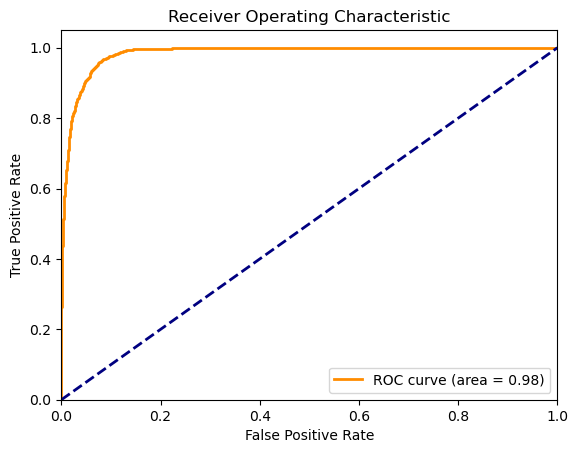

In [200]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<h3 align="center" style="color:red">Model Evaluation : Rankordering, KS statistic, Gini coeff</h3>

In [201]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
42070,0,0.003
35064,0,0.022
435,0,0.004


In [202]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
42070,0,0.003,5
35064,0,0.022,6
435,0,0.004,5


In [206]:
df_decile = df_eval.groupby('Decile', group_keys=False).apply(
    lambda x: pd.Series({
        'Minimum Probability': x['Default Probability'].min(),
        'Maximum Probability': x['Default Probability'].max(),
        'Events': x['Default Truth'].sum(),
        'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),
    })
).reset_index()
df_decile

/var/folders/md/3r5147mj0951vm3v86b8vymmjmg0m4/T/ipykernel_56765/214442773.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile', group_keys=False).apply(


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,0.000,1249.000
6,6,0.005,0.029,1.000,1249.000
7,7,0.029,0.203,9.000,1240.000
8,8,0.203,0.808,158.000,1092.000
9,9,0.808,1.000,906.000,344.000


In [207]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.005,0.000,1249.000,0.000,100.000
6,6,0.005,0.029,1.000,1249.000,0.080,99.920
7,7,0.029,0.203,9.000,1240.000,0.721,99.279
8,8,0.203,0.808,158.000,1092.000,12.640,87.360
9,9,0.808,1.000,906.000,344.000,72.480,27.520


In [208]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.808,1.000,906.000,344.000,72.480,27.520
1,8,0.203,0.808,158.000,1092.000,12.640,87.360
2,7,0.029,0.203,9.000,1240.000,0.721,99.279
3,6,0.005,0.029,1.000,1249.000,0.080,99.920
4,5,0.001,0.005,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [209]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.808,1.000,906.000,344.000,72.480,27.520,906.000,344.000
1,8,0.203,0.808,158.000,1092.000,12.640,87.360,1064.000,1436.000
2,7,0.029,0.203,9.000,1240.000,0.721,99.279,1073.000,2676.000
3,6,0.005,0.029,1.000,1249.000,0.080,99.920,1074.000,3925.000
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [210]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.808,1.000,906.000,344.000,72.480,27.520,906.000,344.000,84.358,3.011
1,8,0.203,0.808,158.000,1092.000,12.640,87.360,1064.000,1436.000,99.069,12.571
2,7,0.029,0.203,9.000,1240.000,0.721,99.279,1073.000,2676.000,99.907,23.426
3,6,0.005,0.029,1.000,1249.000,0.080,99.920,1074.000,3925.000,100.000,34.361
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [211]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.808,1.000,906.000,344.000,72.480,27.520,906.000,344.000,84.358,3.011,81.346
1,8,0.203,0.808,158.000,1092.000,12.640,87.360,1064.000,1436.000,99.069,12.571,86.498
2,7,0.029,0.203,9.000,1240.000,0.721,99.279,1073.000,2676.000,99.907,23.426,76.480
3,6,0.005,0.029,1.000,1249.000,0.080,99.920,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [212]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.984769938007721
Gini Coefficient: 0.9695398760154419


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

<h3 align="center" style="color:red">Finalize The Model and Visualize Feature Importance</h3>

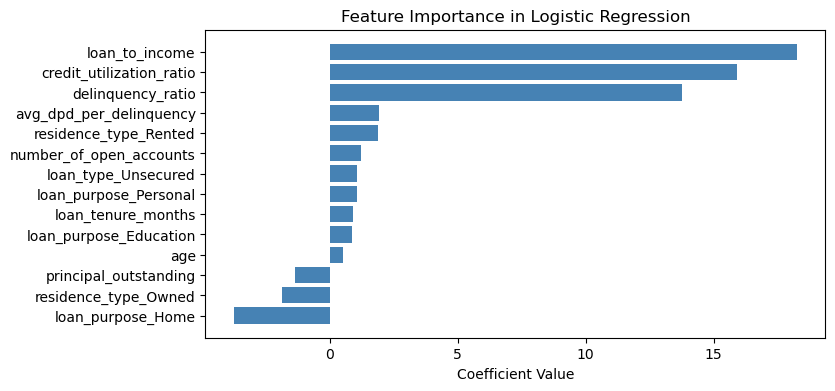

In [214]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

#### Save the Model

In [216]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'principal_outstanding',
       'number_of_open_accounts', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [217]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [218]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'principal_outstanding',
       'number_of_open_accounts', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [220]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'model_data.joblib')

['model_data.joblib']

In [221]:
final_model.coef_, final_model.intercept_

(array([[ 0.52581381,  0.89052899, -1.34953443,  1.21631394, 15.90331595,
         18.26496406, 13.77927533,  1.93184965, -1.86961183,  1.87163743,
          0.85260089, -3.75566465,  1.07459459,  1.07459459]]),
 array([-20.8636924]))